# Stock Prediction and Forecast Using Stacked LSTM

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Stock-MArket-Forecasting/master/AAPL.csv",index_col=0)

In [2]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 147.4+ KB


In [4]:
import matplotlib.pyplot as plt

In [5]:
df_plot = df.copy()

In [6]:
df_plot['date'] = pd.to_datetime(df_plot['date'])

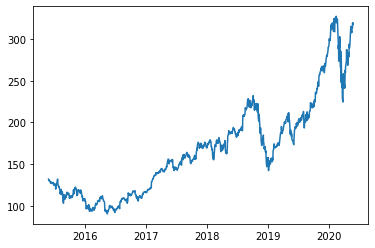

In [7]:
plt.plot(df_plot['date'],df_plot['close']);

In [8]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df['close']).reshape(-1,1))
df_close

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [9]:
df_close.shape

(1258, 1)

In [10]:
##splitting dataset into train and test split
training_size=int(len(df_close)*0.65)
test_size=len(df_close)-training_size
train_data,test_data=df_close[0:training_size,:],df_close[training_size:len(df_close),:1]

In [11]:
train_data[0:10]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817]])

In [12]:
train_data.size,test_data.size

(817, 441)

In [13]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
X_train[0]

array([0.17607447, 0.17495567, 0.16862282, 0.1696994 , 0.16727181,
       0.16794731, 0.16473866, 0.16174111, 0.1581525 , 0.15654817,
       0.16271215, 0.1614878 , 0.1554927 , 0.15443722, 0.15730811,
       0.15604154, 0.15849025, 0.15308621, 0.15735033, 0.15490163,
       0.15946129, 0.15688592, 0.1537195 , 0.14434687, 0.14812547,
       0.15308621, 0.15241071, 0.15055307, 0.14924428, 0.13607194,
       0.12551718, 0.13906949, 0.14911762, 0.14890653, 0.15401503,
       0.16115005, 0.16583636, 0.17618002, 0.17060711, 0.14725998,
       0.14700667, 0.14422021, 0.13691632, 0.13949168, 0.13784514,
       0.13522756, 0.13071012, 0.11863548, 0.10259225, 0.1058009 ,
       0.10466098, 0.10630752, 0.12403952, 0.09773706, 0.10512539,
       0.10474542, 0.10816516, 0.11323144, 0.11044499, 0.10415435,
       0.09419066, 0.06510175, 0.05395592, 0.0565735 , 0.08169383,
       0.09533058, 0.09689268, 0.09465507, 0.07337668, 0.09288187,
       0.08456472, 0.07992063, 0.09275521, 0.0836359 , 0.09385

In [16]:
# create LSTM input
# X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
# X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [17]:
X_train.shape

(716, 100)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
12/12 [==============================] - 6s 185ms/step - loss: 0.0162 - val_loss: 0.0620
Epoch 2/30
12/12 [==============================] - 1s 97ms/step - loss: 0.0036 - val_loss: 0.0044
Epoch 3/30
12/12 [==============================] - 1s 97ms/step - loss: 9.1412e-04 - val_loss: 0.0043
Epoch 4/30
12/12 [==============================] - 1s 97ms/step - loss: 8.7140e-04 - val_loss: 0.0040
Epoch 5/30
12/12 [==============================] - 1s 95ms/step - loss: 7.1339e-04 - val_loss: 0.0056
Epoch 6/30
12/12 [==============================] - 1s 93ms/step - loss: 6.4730e-04 - val_loss: 0.0052
Epoch 7/30
12/12 [==============================] - 1s 92ms/step - loss: 6.2245e-04 - val_loss: 0.0047
Epoch 8/30
12/12 [==============================] - 1s 93ms/step - loss: 5.9129e-04 - val_loss: 0.0044
Epoch 9/30
12/12 [==============================] - 1s 91ms/step - loss: 5.7804e-04 - val_loss: 0.0036
Epoch 10/30
12/12 [==============================] - 1s 93ms/step - loss: 5.9801

In [21]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [22]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [23]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

142.39634131103762

In [24]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

237.74259819078515

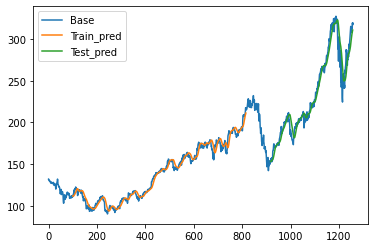

In [25]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df_close)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_close)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_close)-1, :] = test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df_close),label="Base")
plt.plot(trainPredictPlot,label = 'Train_pred')
plt.plot(testPredictPlot,label = 'Test_pred')
plt.legend(loc="upper left")
plt.show();

### demonstrate prediction for next 10 days

In [26]:
#day 100 tips : dimension (batch, timestamp, feats)
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [36]:
#model.predict(np.expand_dims(test_data[341:],0))

In [28]:
forecast = []
d = 1
days = 10

while d <= days:
    fore_cast = model.predict(x_input)
    forecast.append(fore_cast.squeeze())
    new_input = np.append(x_input, fore_cast, axis=1)
    x_input = new_input.squeeze()[1:].reshape(1,-1)
    d += 1
    

In [29]:
forecast = [scaler.inverse_transform(_.reshape(-1,1)).squeeze().tolist() for _ in forecast]

In [30]:
index = np.arange(df_close.shape[0],df_close.shape[0] + 10)

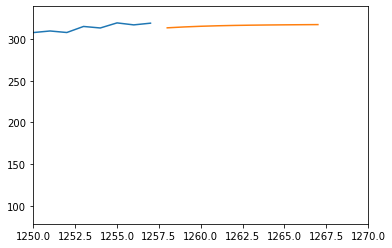

In [31]:
plt.plot(scaler.inverse_transform(df_close),label="Base")
plt.plot(index, forecast, label="Forecast")
plt.xlim([1250, 1270])
plt.show();